In [223]:
%pip install pandas
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


## Loading the data

In [231]:
data = pd.read_csv("retail_sales_dataset.csv")

In [233]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


# data cleaning and data transformation

In [237]:
# data formatting
data['Date'] = pd.to_datetime(data['Date'])
data['Customer ID']= data['Customer ID'].astype('string')
data['Gender']=data['Gender'].astype('string')
data['Product Category']=data['Product Category'].astype('category')
data['Gender']=data['Gender'].astype('category')

In [239]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [241]:
data.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID         string[python]
Gender                    category
Age                          int64
Product Category          category
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [243]:
data['Product Category'].unique()

['Beauty', 'Clothing', 'Electronics']
Categories (3, object): ['Beauty', 'Clothing', 'Electronics']

In [247]:
data.groupby('Product Category').count()  # this shows inappropriate way to see number of records by category

C:\Users\negip\AppData\Local\Temp\ipykernel_7132\3751398237.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('Product Category').count()  # this shows inappropriate way to see number of records by category


,Transaction ID,Date,Customer ID,Gender,Age,Quantity,Price per Unit,Total Amount
Product Category,,,,,,,,
Beauty,307,307,307,307,307,307,307,307
Clothing,351,351,351,351,351,351,351,351
Electronics,342,342,342,342,342,342,342,342


In [249]:
# Number of records per Category
data['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [251]:
#Descriptive Statistics

data.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [253]:
data.isnull().value_counts()

Transaction ID  Date   Customer ID  Gender  Age    Product Category  Quantity  Price per Unit  Total Amount
False           False  False        False   False  False             False     False           False           1000
Name: count, dtype: int64

## Time Series Analysis

Retail Sales data is time-indexed, meaning each record is tied to a specific date(date,weekly,monthly)

In [256]:
import matplotlib.pyplot as plt

In [270]:
# adding new column 'Year' in retail sales data , extract from 'date' Columns


In [272]:
data['Year'].value_counts()

Year
2023    998
2024      2
Name: count, dtype: int64

<Axes: title={'center': 'Daily Sales Trend'}, xlabel='Date'>

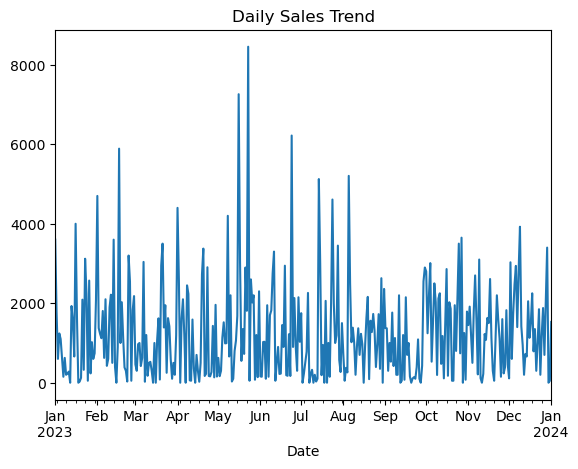

In [274]:
# Total Sales per day
daily_sales=data.resample('D')['Total Amount'].sum()
daily_sales.plot(title='Daily Sales Trend')

C:\Users\negip\AppData\Local\Temp\ipykernel_7132\2800058598.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('Product Category')['Total Amount'].sum().plot(kind='bar')


<Axes: xlabel='Product Category'>

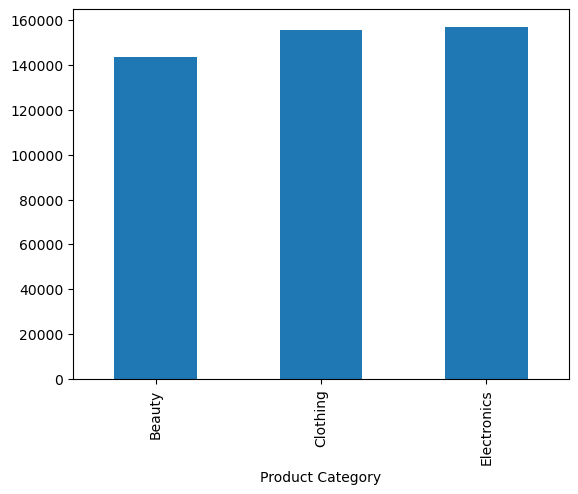

In [278]:
# Total sales by category
data.groupby('Product Category')['Total Amount'].sum().plot(kind='bar')

In [288]:
# Top 10 Customers by spend

data.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)


Customer ID
CUST487    2000
CUST476    2000
CUST773    2000
CUST503    2000
CUST093    2000
CUST089    2000
CUST946    2000
CUST157    2000
CUST155    2000
CUST420    2000
Name: Total Amount, dtype: int64

## Customer and Product Analysis

In [293]:
# Top Spending Customers
top_customers = data.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending = False)
print(top_customers)

Customer ID
CUST487    2000
CUST476    2000
CUST773    2000
CUST503    2000
CUST093    2000
           ... 
CUST309      25
CUST907      25
CUST285      25
CUST242      25
CUST657      25
Name: Total Amount, Length: 1000, dtype: int64


In [297]:
# Customer Purchase Frequency
purchase_count =data['Customer ID'].value_counts()
print(purchase_count.head(5))

Customer ID
CUST001    1
CUST670    1
CUST658    1
CUST686    1
CUST659    1
Name: count, dtype: Int64


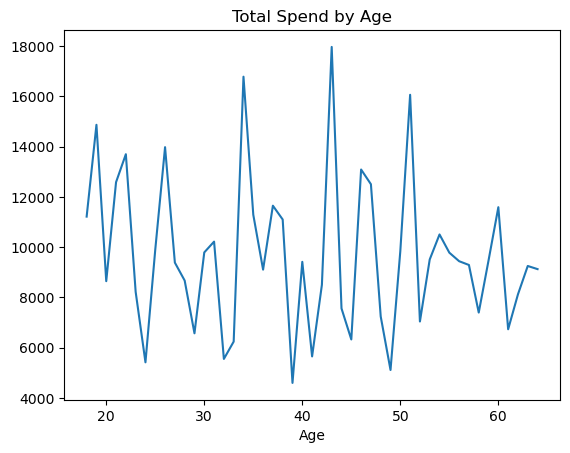

In [299]:
# Customer Segmentation by Age
age_segment= data.groupby('Age')['Total Amount'].sum().plot(kind='line',title='Total Spend by Age')

C:\Users\negip\AppData\Local\Temp\ipykernel_7132\3899370322.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_sales = data.groupby('Gender')['Total Amount'].sum().plot(kind='bar',title='Total Sales by Gender')


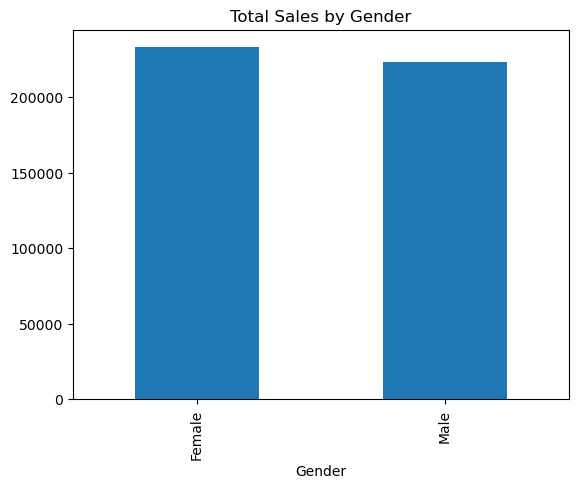

In [301]:
# Gender - wise Spending
gender_sales = data.groupby('Gender')['Total Amount'].sum().plot(kind='bar',title='Total Sales by Gender')

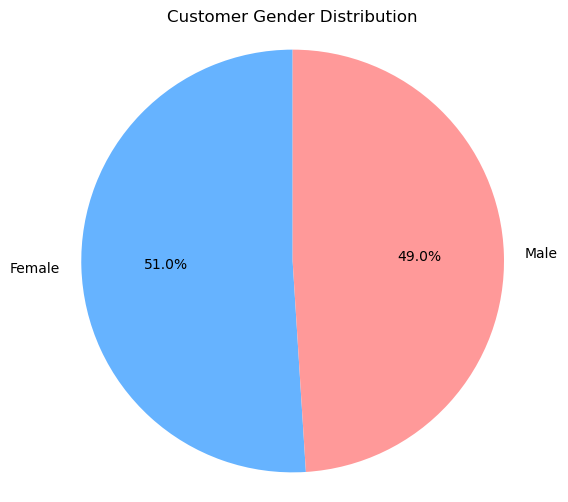

In [311]:
gender_counts=data['Gender'].value_counts()
#plt pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=90,colors=['#66b3ff','#ff9999'])
plt.title('Customer Gender Distribution')
plt.axis('equal') #Equal aspect ratio ensures the pie is circular
plt.show()

In [313]:
# Top Selling Product Categories (by Quantity)

top_categories_qty = data.groupby('Product Category')['Quantity'].sum().sort_values(ascending =False)
print(top_categories_qty)

Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64


C:\Users\negip\AppData\Local\Temp\ipykernel_7132\2958681349.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_categories_qty = data.groupby('Product Category')['Quantity'].sum().sort_values(ascending =False)


In [315]:
# Top Revenue-Generating Categories(by Sales)

top_categories_sales=data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print(top_categories_sales)

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


C:\Users\negip\AppData\Local\Temp\ipykernel_7132\4025189986.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_categories_sales=data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)


In [317]:
# Average Price per Unit per Category
avg_price_per_cat= data.groupby('Product Category')['Price per Unit'].mean()
print(avg_price_per_cat)

Product Category
Beauty         184.055375
Clothing       174.287749
Electronics    181.900585
Name: Price per Unit, dtype: float64


C:\Users\negip\AppData\Local\Temp\ipykernel_7132\2570644320.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_per_cat= data.groupby('Product Category')['Price per Unit'].mean()
